In [1]:
## Imports and such
import sys
sys.path.append('../')

from ibmfl_cli_automator.run import get_config, Runner, changedict

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os

fusion_algos = os.listdir("../../testtest/agg_tests")

In [4]:
fusion_algos

['shuf_iter_avg', 'fed_avg', 'prob_fed_match', 'coord_med', 'krum', 'iter_avg']

In [5]:
results = {}
n_trials = 7

In [13]:
import pandas as pd
import numpy as np

def av(item):
    arr = np.array(item)
    avg = arr.mean(axis=0).flatten()
    return avg

def process_trial_results(results):
    """
    averages the two numbers per round/metric, then takes the avg and std
    of each round/metric across the trials
    """
    dfs = []
    for i in range(n_trials):
        rounds = results[i]['metadata'][0]['round_no']
        dfs.append(pd.DataFrame(
            {key: av(item) for key, item in results[i].items()
            if key is not "metadata"},
            index=rounds
        ))

    return {
        "avg": pd.DataFrame(
            np.array(dfs).mean(axis=0), index=dfs[0].index, columns=dfs[0].columns
        ),
        "std": pd.DataFrame(
            np.array(dfs).std(axis=0), index=dfs[0].index, columns=dfs[0].columns
        )
    }


def process_better_trial_results(dfs):
    """
    averages the two numbers per round/metric, then takes the avg and std
    of each round/metric across the trials
    """

    return {
        "avg": pd.DataFrame(
            np.array(dfs).mean(axis=0), index=dfs[0].index, columns=dfs[0].columns
        ),
        "std": pd.DataFrame(
            np.array(dfs).std(axis=0), index=dfs[0].index, columns=dfs[0].columns
        )
    }

import json


def postproc_fn(staging):
    folder = f"{staging}/latest/"
    parties = {}
    for obj in os.listdir(folder):
        if obj.endswith(".json"):
            party = int(obj[:-5].split("party")[1])
            dfs = []
            with open(f"{folder}/{obj}", 'r') as openfile:
                json_object = json.load(openfile)
                for round in json_object:
                    round_no = round['round_no']
                    dfs.append(pd.DataFrame(round).iloc[:, 1:3])
                    dfs[round_no] = dfs[round_no].append(
                        pd.Series(
                            dfs[round_no].iloc[0] - dfs[0].iloc[0],
                            name="te"
                        )
                    )
                    dfs[round_no] = pd.Series(
                        dfs[round_no].iloc[:, 0].tolist() + \
                        dfs[round_no].iloc[:, 0].tolist(),
                        index=("pre_train:" + dfs[round_no].index).tolist() + \
                        ("post_train:" + dfs[round_no].index).tolist(),
                        name=round_no
                    )
                parties[party] = pd.DataFrame(dfs)

    round_results = np.array(list(parties.values())).mean(axis=0)

    round_avgs = pd.DataFrame(
        round_results,
        index=parties[0].index,
        columns=parties[0].columns
    )
    round_avgs.axes[0].name = "round"

    return round_avgs

'testing fusion algorithm:'

'shuf_iter_avg'

Starting trial 1/1 at 2023-04-19 03:42:05:
Trial has ID 20230419T034205
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-18 23:48:28!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034205/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034205/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034205/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034205/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034205/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034205/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034205/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

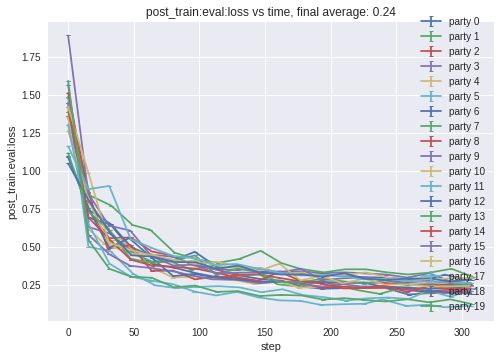

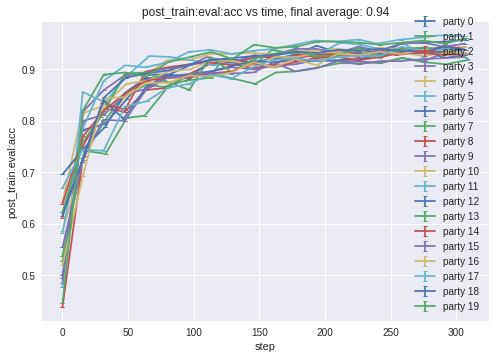

Starting trial 1/1 at 2023-04-19 03:48:37:
Trial has ID 20230419T034837
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-18 23:55:00!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034837/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034837/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034837/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034837/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034837/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034837/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T034837/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

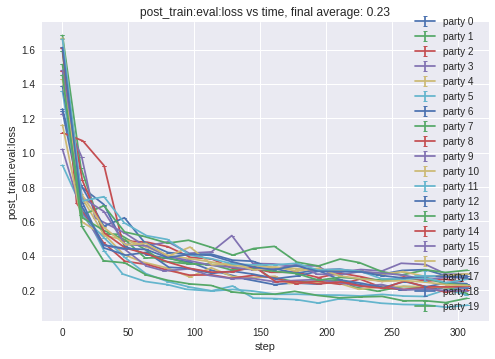

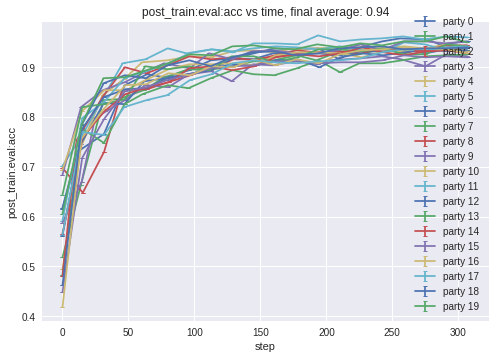

Starting trial 1/1 at 2023-04-19 03:55:09:
Trial has ID 20230419T035509
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:01:31!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T035509/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T035509/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T035509/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T035509/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T035509/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T035509/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T035509/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

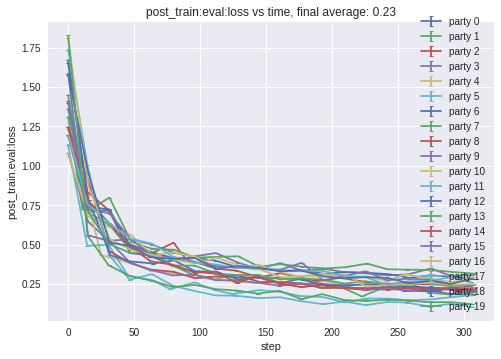

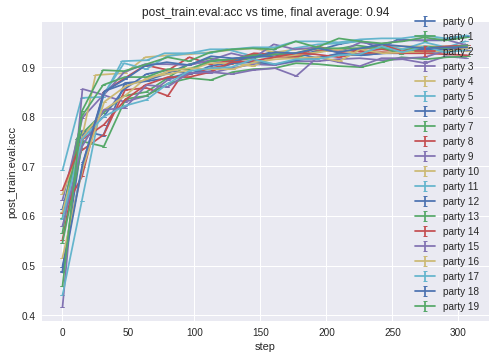

Starting trial 1/1 at 2023-04-19 04:01:40:
Trial has ID 20230419T040140
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:08:04!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040140/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040140/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040140/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040140/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040140/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040140/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040140/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

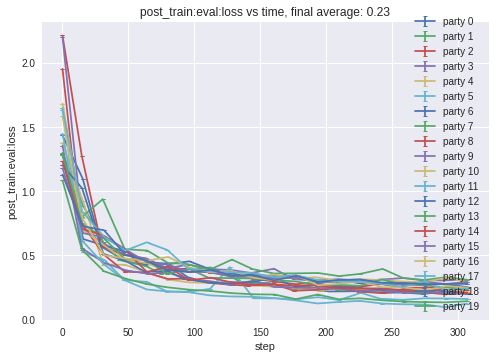

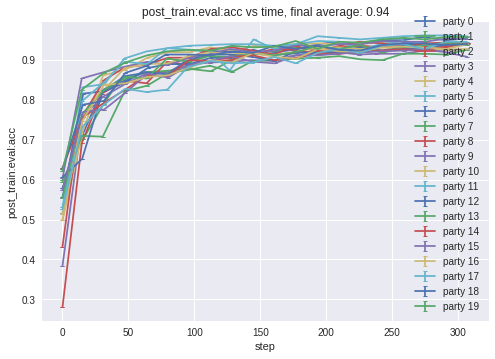

Starting trial 1/1 at 2023-04-19 04:08:12:
Trial has ID 20230419T040812
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:14:35!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040812/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040812/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040812/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040812/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040812/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040812/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T040812/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

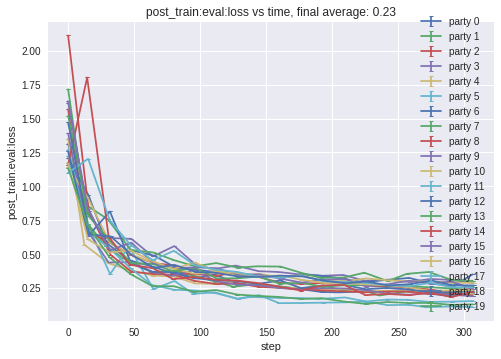

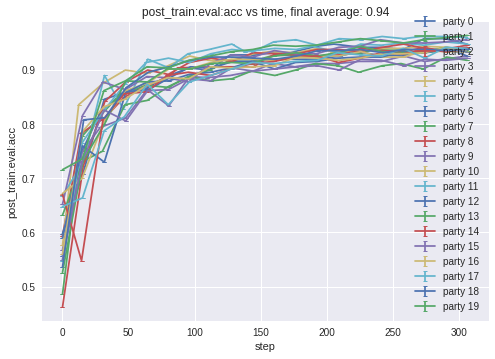

Starting trial 1/1 at 2023-04-19 04:14:43:
Trial has ID 20230419T041443
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:21:04!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T041443/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T041443/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T041443/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T041443/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T041443/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T041443/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T041443/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

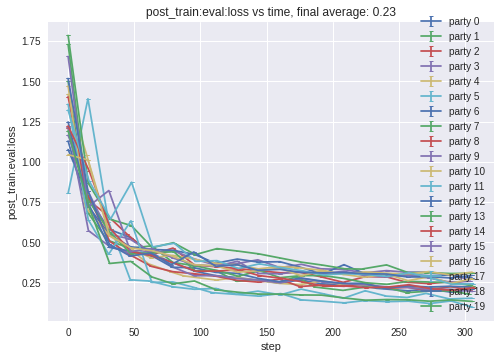

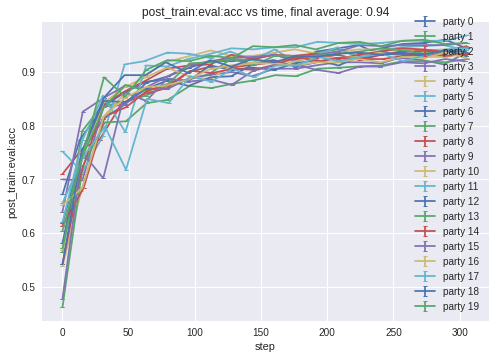

Starting trial 1/1 at 2023-04-19 04:21:13:
Trial has ID 20230419T042113
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:27:35!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042113/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042113/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042113/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042113/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042113/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042113/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042113/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

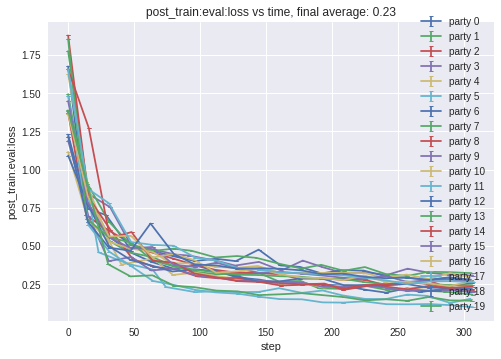

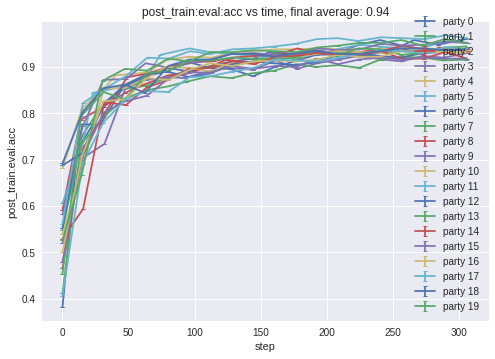

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681877e+09                  NaN                 NaN   
1      1.681877e+09             0.912303            0.775700   
2      1.681877e+09             0.486072            0.863486   
3      1.681877e+09             0.370388            0.888286   
4      1.681877e+09             0.325589            0.903543   
5      1.681877e+09             0.300030            0.913114   
6      1.681877e+09             0.281772            0.919500   
7      1.681877e+09             0.266402            0.924757   
8      1.681877e+09             0.254426            0.928229   
9      1.681877e+09             0.245025            0.930700   
10     1.681877e+09             0.234996            0.933529   
11     1.681877e+09             0.228205            0.935329   
12     1.681877e+09             0.222007            0.937314   
13     1.681877e+09             0.215413            0.940229   
14     1.681877e+09             0.211491            0.942186   
15     1.681877e+09             0.207149            0.944000   
16     1.681877e+09             0.203063            0.945557   
17     1.681877e+09             0.198933            0.947257   
18     1.681877e+09             0.196362            0.948543   
19     1.681877e+09             0.193253            0.949471   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.623643                        0.970643   
2                     0.853643                        0.929071   
3                     0.889071                        0.922071   
4                     0.906071                        0.926429   
5                     0.915929                        0.930286   
6                     0.921500                        0.933286   
7                     0.926571                        0.935857   
8                     0.930000                        0.937857   
9                     0.932857                        0.939643   
10                    0.935357                        0.941571   
11                    0.937357                        0.943571   
12                    0.939214                        0.945071   
13                    0.941214                        0.947857   
14                    0.943000                        0.948000   
15                    0.944429                        0.949357   
16                    0.946071                        0.951071   
17                    0.947214                        0.951929   
18                    0.948786                        0.952929   
19                    0.949643                        0.953500   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.459929                 0.535000   
2                         0.789571                 0.837500   
3                         0.858500                 0.881643   
4                         0.885571                 0.900143   
5                         0.900786                 0.911000   
6                         0.910000                 0.917714   
7                         0.918071                 0.923429   
8                         0.922857                 0.927571   
9                         0.926000                 0.930857   
10                        0.928143                 0.932857   
11                        0.932571                 0.935929   
12                        0.934143                 0.937929   
13                        0.936786                 0.940500   
14                        0.938429                 0.942000   
15                        0.939857                 0.943214   
16         

'testing fusion algorithm:'

'fed_avg'

Starting trial 1/1 at 2023-04-19 04:27:43:
Trial has ID 20230419T042743
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:34:06!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042743/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042743/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042743/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042743/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042743/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042743/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T042743/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

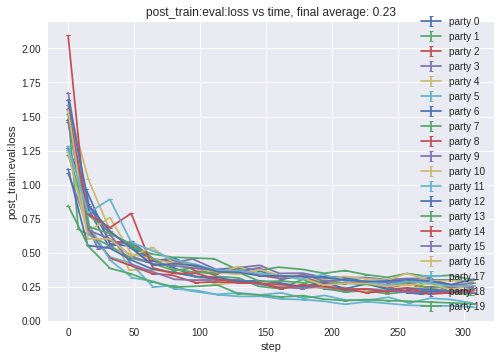

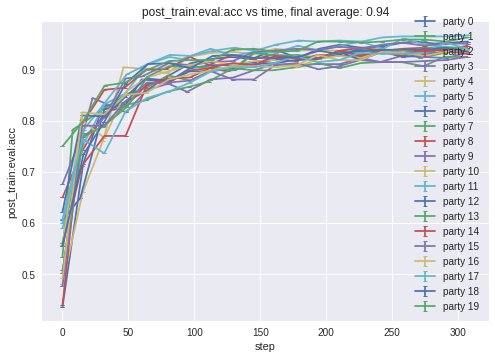

Starting trial 1/1 at 2023-04-19 04:34:15:
Trial has ID 20230419T043415
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:40:38!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T043415/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T043415/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T043415/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T043415/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T043415/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T043415/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T043415/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

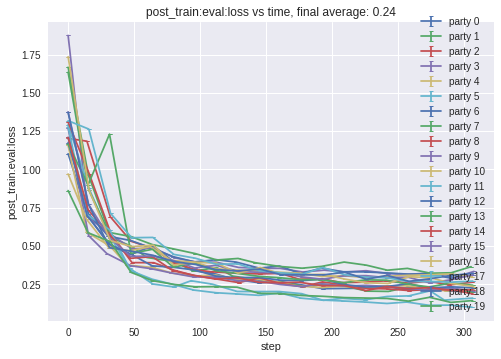

Starting trial 1/1 at 2023-04-19 04:40:46:
Trial has ID 20230419T044046
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:47:10!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044046/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044046/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044046/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044046/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044046/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044046/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044046/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

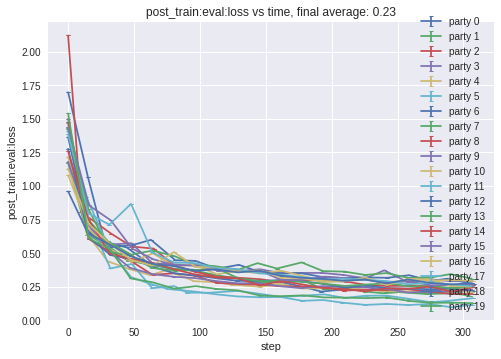

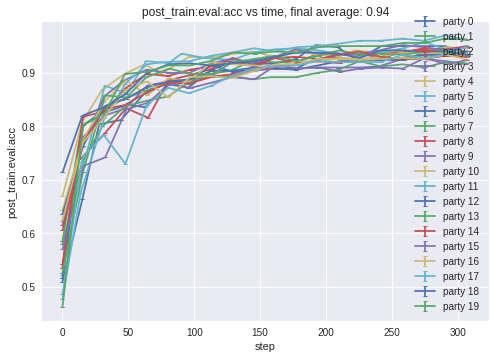

Starting trial 1/1 at 2023-04-19 04:47:18:
Trial has ID 20230419T044718
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 00:53:40!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044718/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044718/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044718/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044718/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044718/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044718/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T044718/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

Starting trial 1/1 at 2023-04-19 04:53:49:
Trial has ID 20230419T045349
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 01:00:13!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T045349/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T045349/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T045349/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T045349/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T045349/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T045349/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T045349/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

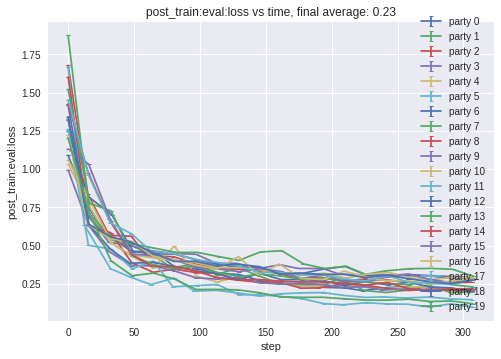

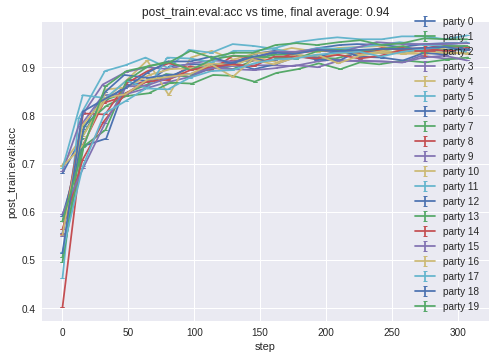

Starting trial 1/1 at 2023-04-19 05:00:21:
Trial has ID 20230419T050021
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 01:06:43!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050021/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050021/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050021/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050021/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050021/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050021/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050021/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

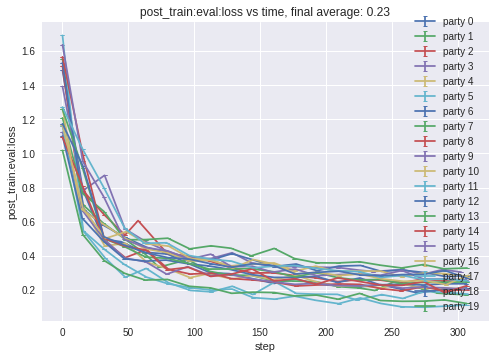

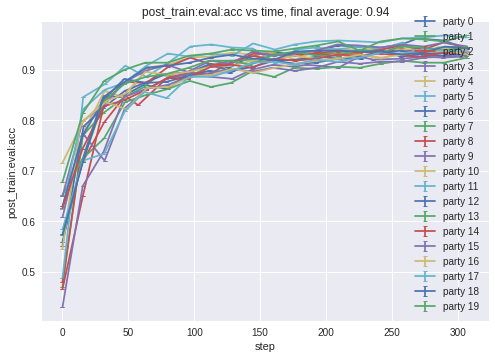

Starting trial 1/1 at 2023-04-19 05:06:51:
Trial has ID 20230419T050651
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 01:13:14!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050651/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050651/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050651/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050651/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050651/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050651/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T050651/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

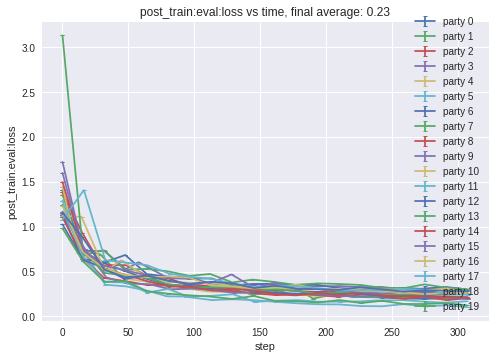

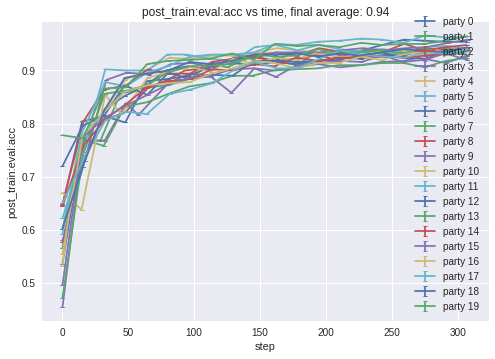

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681880e+09                  NaN                 NaN   
1      1.681880e+09             0.896191            0.785086   
2      1.681880e+09             0.489735            0.857386   
3      1.681880e+09             0.373257            0.884800   
4      1.681880e+09             0.325533            0.904271   
5      1.681880e+09             0.301127            0.912771   
6      1.681880e+09             0.282900            0.919243   
7      1.681880e+09             0.267698            0.924557   
8      1.681880e+09             0.255323            0.928214   
9      1.681880e+09             0.244831            0.930900   
10     1.681880e+09             0.236541            0.932714   
11     1.681880e+09             0.228809            0.935514   
12     1.681880e+09             0.221772            0.937386   
13     1.681880e+09             0.216615            0.939714   
14     1.681880e+09             0.211860            0.942100   
15     1.681880e+09             0.207294            0.943986   
16     1.681880e+09             0.203660            0.945571   
17     1.681880e+09             0.200339            0.946814   
18     1.681880e+09             0.196135            0.948529   
19     1.681880e+09             0.193467            0.949571   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.631214                        0.973071   
2                     0.849571                        0.923071   
3                     0.886357                        0.918714   
4                     0.905500                        0.927643   
5                     0.914571                        0.929500   
6                     0.921357                        0.932929   
7                     0.926857                        0.935357   
8                     0.929429                        0.937929   
9                     0.932929                        0.940143   
10                    0.935286                        0.941357   
11                    0.937571                        0.943786   
12                    0.939714                        0.944786   
13                    0.940643                        0.946429   
14                    0.942857                        0.948500   
15                    0.944929                        0.949786   
16                    0.945500                        0.950357   
17                    0.947286                        0.952071   
18                    0.948857                        0.953357   
19                    0.949500                        0.954214   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.467857                 0.544429   
2                         0.787214                 0.831429   
3                         0.856500                 0.878500   
4                         0.885143                 0.901286   
5                         0.900286                 0.910857   
6                         0.910429                 0.918143   
7                         0.917786                 0.923786   
8                         0.922500                 0.927643   
9                         0.925857                 0.930714   
10                        0.928643                 0.933714   
11                        0.931357                 0.936643   
12                        0.934214                 0.938357   
13                        0.936214                 0.939929   
14                        0.938286                 0.941571   
15                        0.940143                 0.943357   
16         

'testing fusion algorithm:'

'prob_fed_match'

Starting trial 1/1 at 2023-04-19 05:13:22:
Trial has ID 20230419T051322
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 01:21:46!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T051322/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T051322/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T051322/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T051322/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T051322/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T051322/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T051322/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

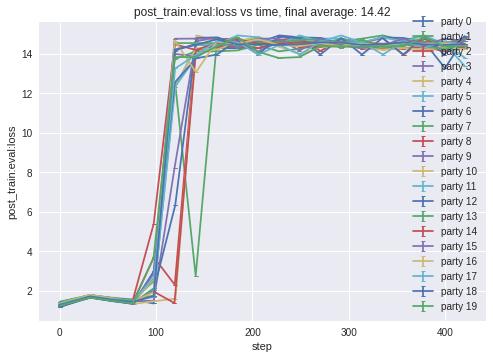

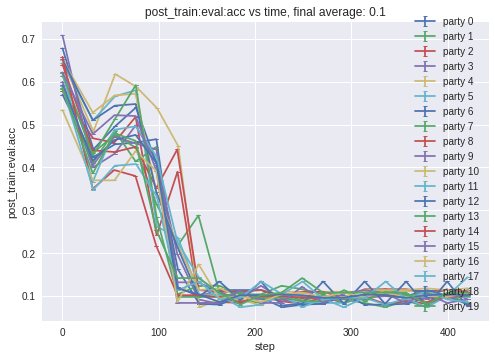

Starting trial 1/1 at 2023-04-19 05:21:53:
Trial has ID 20230419T052153
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 01:30:15!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T052153/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T052153/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T052153/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T052153/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T052153/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T052153/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T052153/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

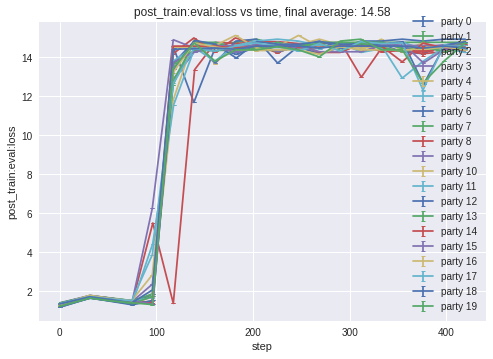

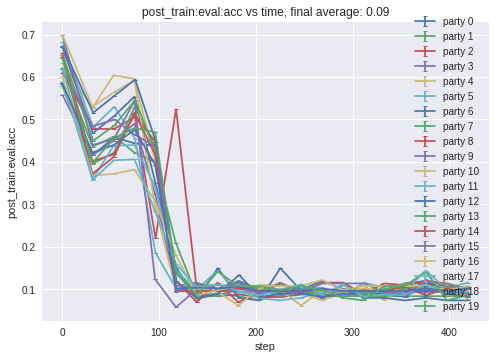

Starting trial 1/1 at 2023-04-19 05:30:22:
Trial has ID 20230419T053022
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 01:38:44!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053022/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053022/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053022/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053022/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053022/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053022/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053022/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

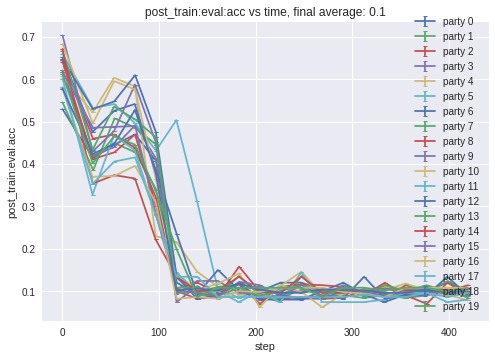

Starting trial 1/1 at 2023-04-19 05:38:51:
Trial has ID 20230419T053851
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 01:47:13!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053851/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053851/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053851/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053851/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053851/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053851/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T053851/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

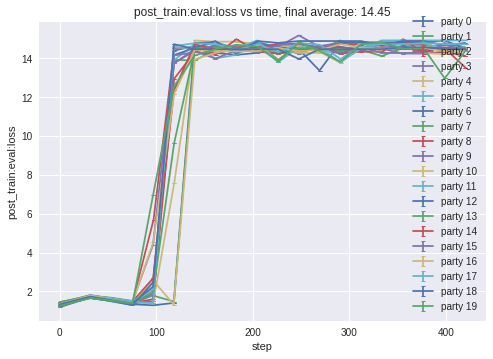

Starting trial 1/1 at 2023-04-19 05:47:20:
Trial has ID 20230419T054720
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 01:55:41!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T054720/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T054720/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T054720/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T054720/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T054720/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T054720/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T054720/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

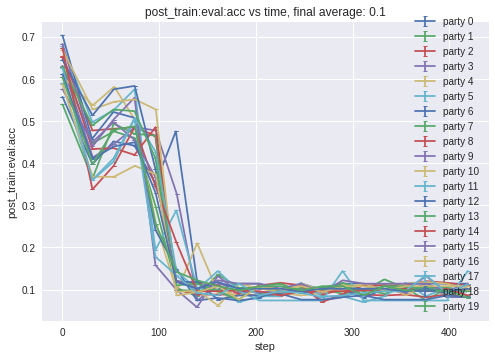

Starting trial 1/1 at 2023-04-19 05:55:48:
Trial has ID 20230419T055548
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:04:07!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T055548/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T055548/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T055548/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T055548/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T055548/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T055548/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T055548/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

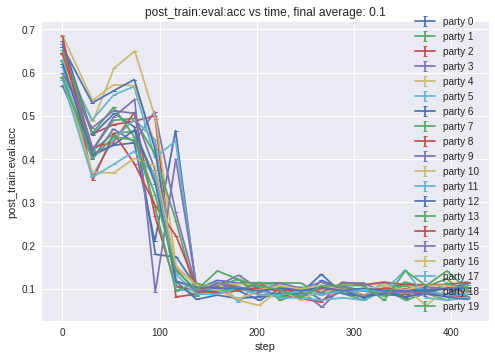

Starting trial 1/1 at 2023-04-19 06:04:15:
Trial has ID 20230419T060415
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:12:36!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T060415/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T060415/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T060415/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T060415/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T060415/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T060415/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T060415/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

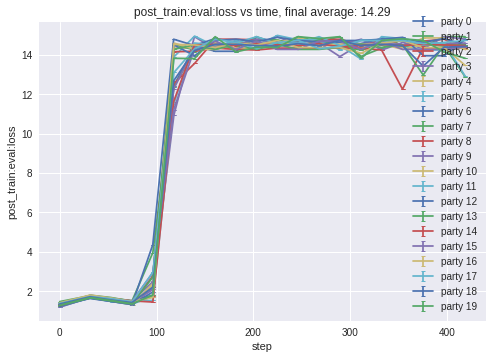

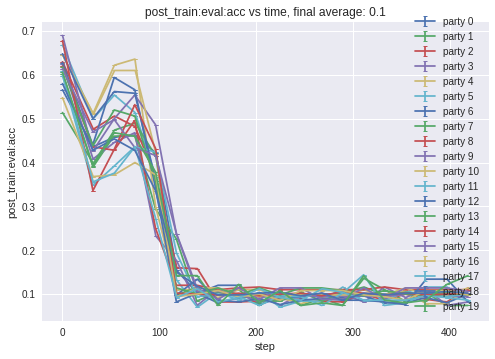

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681883e+09                  NaN                 NaN   
1      1.681883e+09             2.102401            0.241957   
2      1.681883e+09             2.026489            0.288300   
3      1.681883e+09             1.990721            0.291529   
4      1.681883e+09             1.952724            0.294443   
5      1.681883e+09             1.921137            0.294071   
6      1.681883e+09            13.566260            0.127800   
7      1.681883e+09             6.561271            0.114043   
8      1.681883e+09             9.983136            0.121743   
9      1.681883e+09             6.658478            0.106629   
10     1.681883e+09             7.401967            0.108129   
11     1.681883e+09             6.624137            0.114186   
12     1.681883e+09            11.439602            0.111186   
13     1.681883e+09             4.712623            0.108129   
14     1.681883e+09             8.346060            0.108157   
15     1.681883e+09             5.763714            0.111157   
16     1.681883e+09             5.153528            0.109657   
17     1.681883e+09             4.691721            0.109657   
18     1.681883e+09             5.284894            0.114186   
19     1.681883e+09             4.653100            0.106629   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.000500                        0.228571   
2                     0.003357                        0.592857   
3                     0.011214                        0.857143   
4                     0.026929                        0.971429   
5                     0.083071                        0.997929   
6                     0.127500                        0.127500   
7                     0.102286                        0.279000   
8                     0.090786                        0.090786   
9                     0.041357                        0.041643   
10                    0.031786                        0.031786   
11                    0.050571                        0.052000   
12                    0.095357                        0.095357   
13                    0.031143                        0.031286   
14                    0.077143                        0.077143   
15                    0.050000                        0.050286   
16                    0.048071                        0.049643   
17                    0.061357                        0.062143   
18                    0.054500                        0.055214   
19                    0.044143                        0.044857   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.000000                 0.000714   
2                         0.001429                 0.002857   
3                         0.004857                 0.010143   
4                         0.013857                 0.023714   
5                         0.043500                 0.056929   
6                         0.127500                 0.022000   
7                         0.086071                 0.031429   
8                         0.090786                 0.022000   
9                         0.041000                 0.007929   
10                        0.031786                 0.005786   
11                        0.049857                 0.009357   
12                        0.095357                 0.017357   
13                        0.031143                 0.005643   
14                        0.077143                 0.014214   
15                        0.049714                 0.009000   
16         

'testing fusion algorithm:'

'coord_med'

Starting trial 1/1 at 2023-04-19 06:12:43:
Trial has ID 20230419T061243
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:19:14!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061243/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061243/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061243/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061243/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061243/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061243/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061243/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

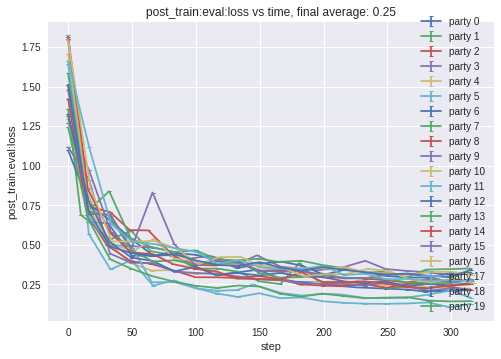

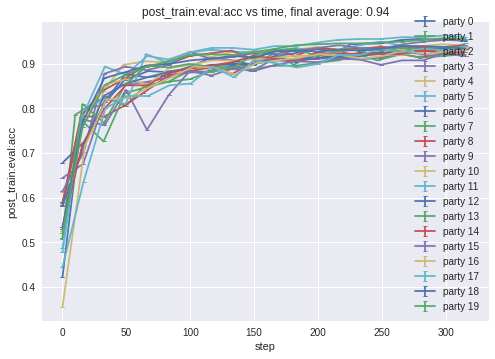

Starting trial 1/1 at 2023-04-19 06:19:23:
Trial has ID 20230419T061923
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:25:55!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061923/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061923/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061923/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061923/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061923/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061923/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T061923/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

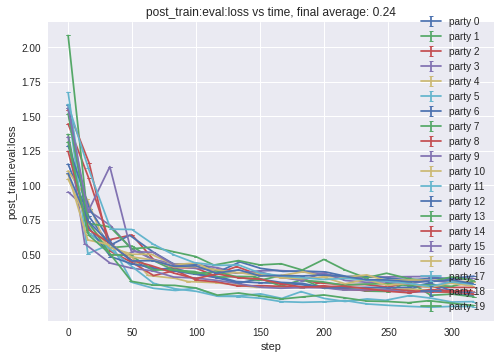

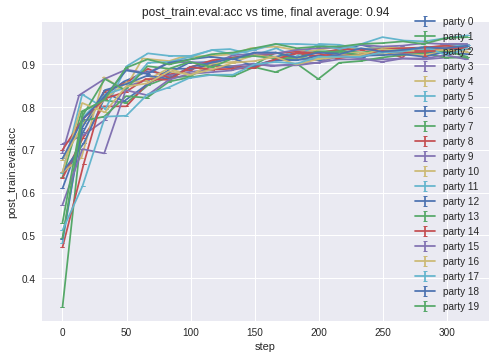

Starting trial 1/1 at 2023-04-19 06:26:04:
Trial has ID 20230419T062604
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:32:35!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T062604/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T062604/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T062604/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T062604/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T062604/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T062604/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T062604/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

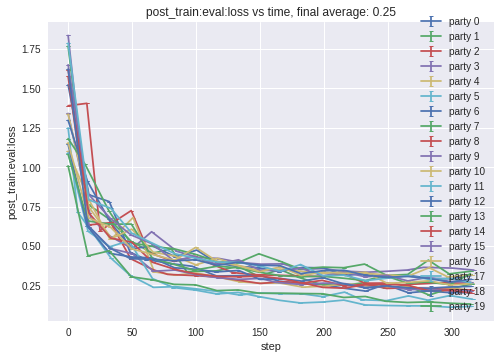

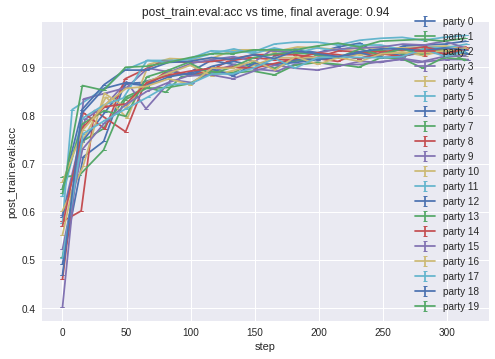

Starting trial 1/1 at 2023-04-19 06:32:44:
Trial has ID 20230419T063244
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:39:16!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063244/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063244/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063244/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063244/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063244/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063244/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063244/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

Starting trial 1/1 at 2023-04-19 06:39:25:
Trial has ID 20230419T063925
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:45:58!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063925/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063925/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063925/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063925/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063925/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063925/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T063925/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

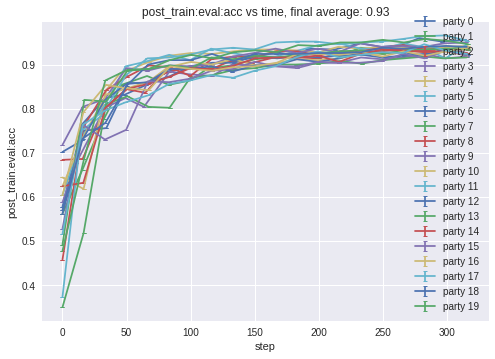

Starting trial 1/1 at 2023-04-19 06:46:06:
Trial has ID 20230419T064606
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:52:37!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T064606/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T064606/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T064606/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T064606/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T064606/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T064606/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T064606/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

Starting trial 1/1 at 2023-04-19 06:52:45:
Trial has ID 20230419T065245
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 02:59:16!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065245/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065245/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065245/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065245/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065245/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065245/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065245/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

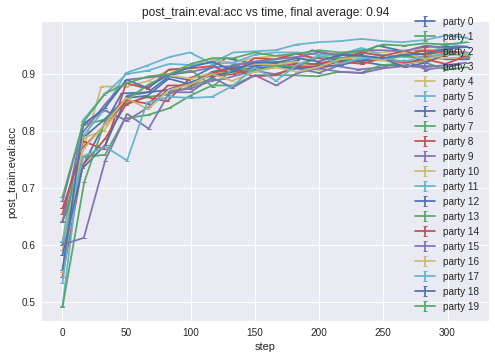

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681886e+09                  NaN                 NaN   
1      1.681886e+09             0.956002            0.758400   
2      1.681886e+09             0.507836            0.857743   
3      1.681886e+09             0.382660            0.885029   
4      1.681886e+09             0.334927            0.899514   
5      1.681886e+09             0.309499            0.910414   
6      1.681886e+09             0.291169            0.916600   
7      1.681886e+09             0.277264            0.921571   
8      1.681886e+09             0.265507            0.925629   
9      1.681886e+09             0.258051            0.927686   
10     1.681886e+09             0.248815            0.930071   
11     1.681886e+09             0.242966            0.931143   
12     1.681886e+09             0.236185            0.933914   
13     1.681886e+09             0.230600            0.935643   
14     1.681886e+09             0.223028            0.938300   
15     1.681886e+09             0.219606            0.940157   
16     1.681886e+09             0.215021            0.941771   
17     1.681886e+09             0.210178            0.943500   
18     1.681886e+09             0.208081            0.944729   
19     1.681886e+09             0.205362            0.945814   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.600429                        0.975000   
2                     0.844857                        0.928357   
3                     0.886214                        0.924286   
4                     0.900786                        0.925786   
5                     0.912143                        0.928357   
6                     0.918143                        0.930857   
7                     0.923143                        0.933286   
8                     0.927500                        0.935571   
9                     0.929571                        0.936071   
10                    0.931429                        0.938714   
11                    0.933429                        0.939286   
12                    0.935929                        0.941857   
13                    0.937929                        0.943071   
14                    0.939714                        0.946643   
15                    0.941357                        0.947357   
16                    0.943071                        0.948214   
17                    0.944000                        0.949143   
18                    0.946143                        0.950786   
19                    0.946286                        0.950929   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.434857                 0.505571   
2                         0.775000                 0.826786   
3                         0.851643                 0.877929   
4                         0.877857                 0.895286   
5                         0.896500                 0.907429   
6                         0.905214                 0.914929   
7                         0.913143                 0.919500   
8                         0.918857                 0.924357   
9                         0.921643                 0.926429   
10                        0.924643                 0.929357   
11                        0.927643                 0.931429   
12                        0.930214                 0.933929   
13                        0.932429                 0.936214   
14                        0.935286                 0.938643   
15                        0.937071                 0.940429   
16         

'testing fusion algorithm:'

'krum'

Starting trial 1/1 at 2023-04-19 06:59:24:
Trial has ID 20230419T065924
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:06:03!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065924/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065924/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065924/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065924/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065924/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065924/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T065924/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

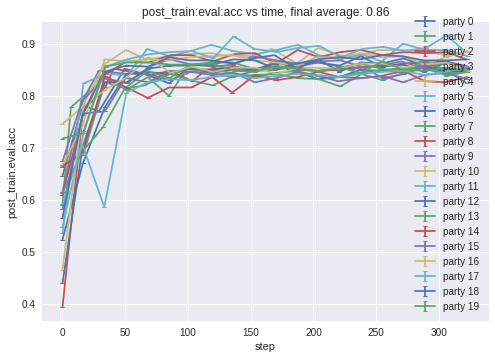

Starting trial 1/1 at 2023-04-19 07:06:12:
Trial has ID 20230419T070612
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:12:49!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T070612/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T070612/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T070612/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T070612/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T070612/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T070612/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T070612/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

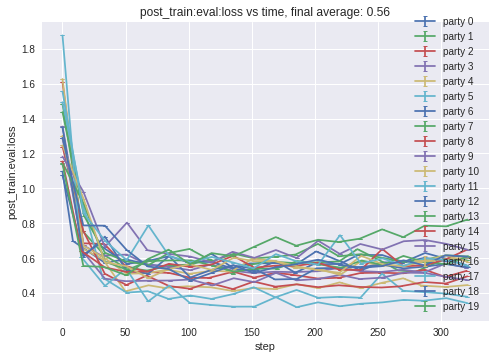

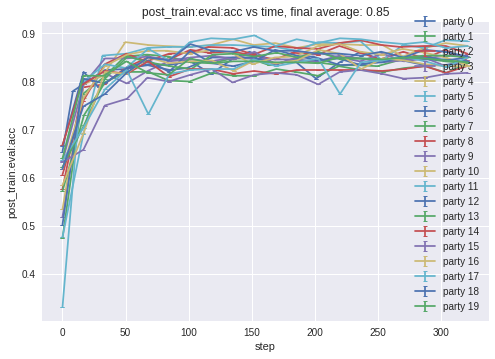

Starting trial 1/1 at 2023-04-19 07:12:57:
Trial has ID 20230419T071257
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:19:36!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071257/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071257/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071257/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071257/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071257/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071257/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071257/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

Starting trial 1/1 at 2023-04-19 07:19:44:
Trial has ID 20230419T071944
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:26:23!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071944/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071944/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071944/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071944/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071944/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071944/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T071944/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

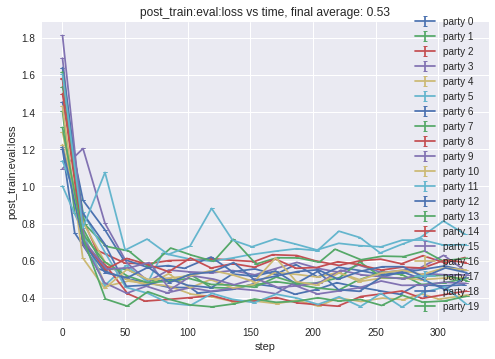

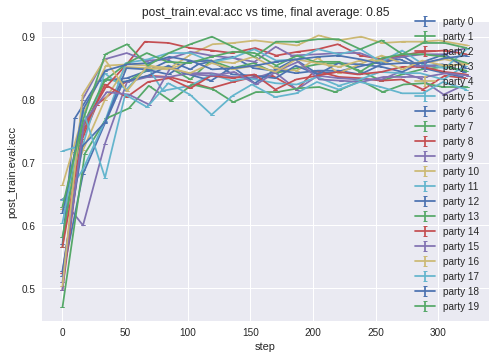

Starting trial 1/1 at 2023-04-19 07:26:32:
Trial has ID 20230419T072632
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:33:10!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T072632/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T072632/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T072632/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T072632/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T072632/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T072632/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T072632/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

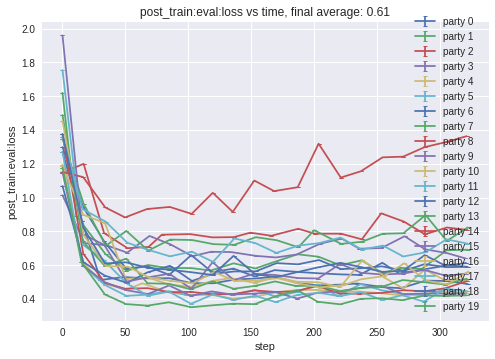

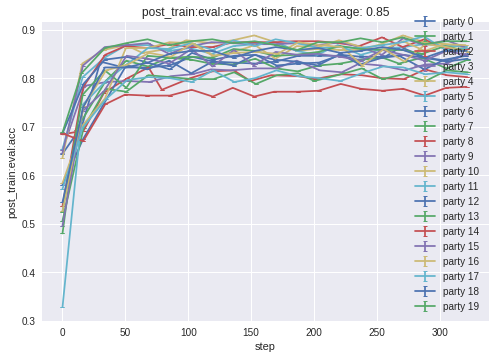

Starting trial 1/1 at 2023-04-19 07:33:19:
Trial has ID 20230419T073319
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:40:00!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T073319/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T073319/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T073319/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T073319/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T073319/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T073319/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T073319/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

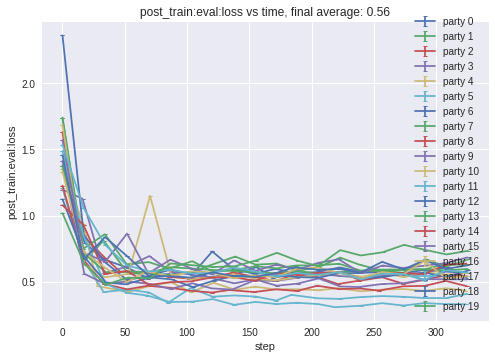

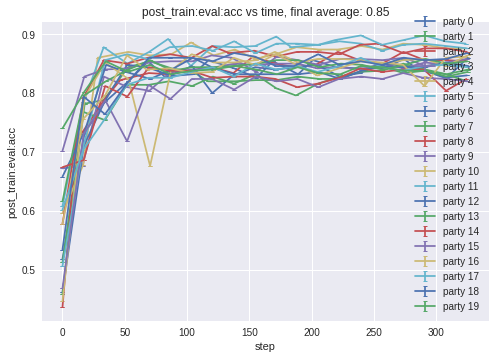

Starting trial 1/1 at 2023-04-19 07:40:09:
Trial has ID 20230419T074009
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:46:48!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074009/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074009/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074009/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074009/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074009/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074009/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074009/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

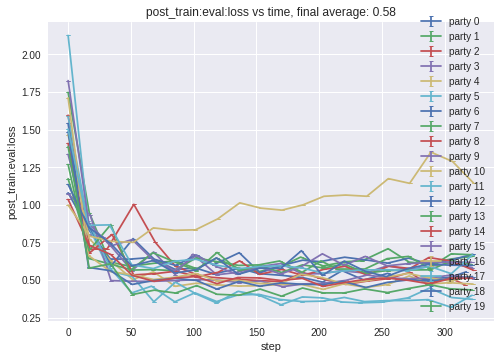

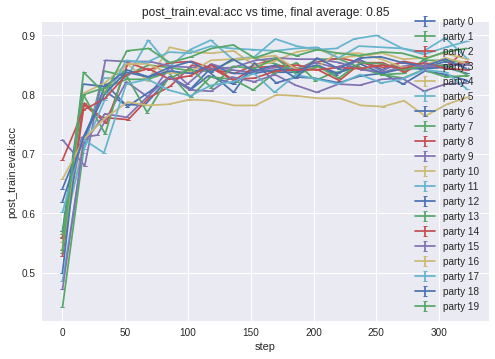

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681889e+09                  NaN                 NaN   
1      1.681889e+09             1.074059            0.675400   
2      1.681889e+09             0.791519            0.741600   
3      1.681889e+09             0.640102            0.804429   
4      1.681889e+09             0.663589            0.809186   
5      1.681889e+09             0.695996            0.813929   
6      1.681889e+09             0.749196            0.807986   
7      1.681889e+09             0.731406            0.814414   
8      1.681889e+09             0.768063            0.817300   
9      1.681889e+09             0.794312            0.813943   
10     1.681889e+09             0.827802            0.812900   
11     1.681889e+09             0.839540            0.814371   
12     1.681889e+09             0.850722            0.815914   
13     1.681889e+09             0.895685            0.815500   
14     1.681889e+09             0.918036            0.813314   
15     1.681889e+09             0.925084            0.814457   
16     1.681889e+09             0.924071            0.819700   
17     1.681889e+09             0.928118            0.820886   
18     1.681889e+09             0.988342            0.815314   
19     1.681889e+09             1.003332            0.813943   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.545286                        0.873000   
2                     0.734286                        0.814500   
3                     0.807071                        0.843071   
4                     0.811643                        0.836214   
5                     0.817286                        0.836714   
6                     0.810857                        0.827643   
7                     0.817571                        0.833143   
8                     0.819714                        0.832500   
9                     0.815786                        0.828000   
10                    0.815857                        0.827214   
11                    0.816214                        0.827071   
12                    0.818929                        0.828357   
13                    0.817714                        0.826786   
14                    0.815500                        0.825214   
15                    0.816714                        0.824571   
16                    0.822143                        0.829786   
17                    0.823214                        0.830571   
18                    0.817429                        0.825000   
19                    0.816143                        0.821929   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.402429                 0.452071   
2                         0.670000                 0.693929   
3                         0.772857                 0.792786   
4                         0.789214                 0.799143   
5                         0.799214                 0.807286   
6                         0.794929                 0.798286   
7                         0.802357                 0.806929   
8                         0.808143                 0.809929   
9                         0.804571                 0.807000   
10                        0.804714                 0.804786   
11                        0.805500                 0.806429   
12                        0.809286                 0.809643   
13                        0.809000                 0.808714   
14                        0.807214                 0.805714   
15                        0.808143                 0.806929   
16         

'testing fusion algorithm:'

'iter_avg'

Starting trial 1/1 at 2023-04-19 07:46:57:
Trial has ID 20230419T074657
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:53:19!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074657/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074657/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074657/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074657/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074657/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074657/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T074657/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

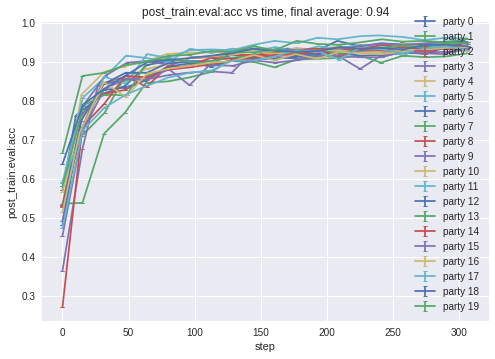

Starting trial 1/1 at 2023-04-19 07:53:27:
Trial has ID 20230419T075327
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 03:59:49!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075327/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075327/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075327/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075327/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075327/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075327/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075327/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

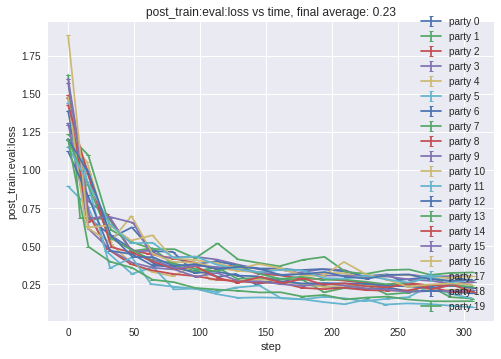

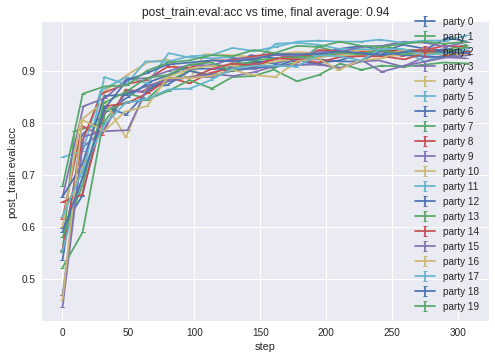

Starting trial 1/1 at 2023-04-19 07:59:57:
Trial has ID 20230419T075957
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 04:06:19!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075957/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075957/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075957/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075957/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075957/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075957/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T075957/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

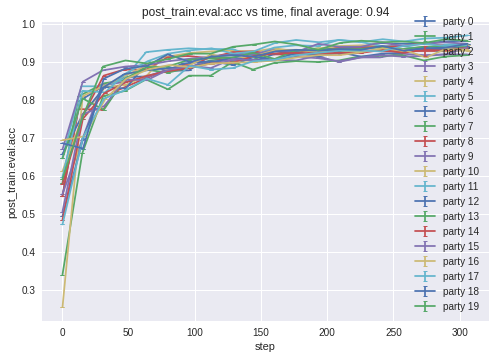

Starting trial 1/1 at 2023-04-19 08:06:27:
Trial has ID 20230419T080627
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 04:12:50!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T080627/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T080627/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T080627/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T080627/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T080627/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T080627/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T080627/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

Starting trial 1/1 at 2023-04-19 08:12:58:
Trial has ID 20230419T081258
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 04:19:21!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081258/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081258/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081258/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081258/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081258/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081258/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081258/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

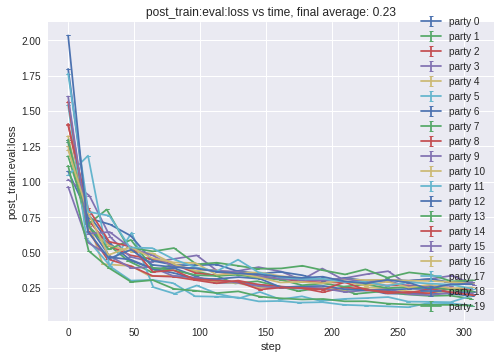

Starting trial 1/1 at 2023-04-19 08:19:29:
Trial has ID 20230419T081929
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 04:25:52!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081929/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081929/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081929/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081929/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081929/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081929/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T081929/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

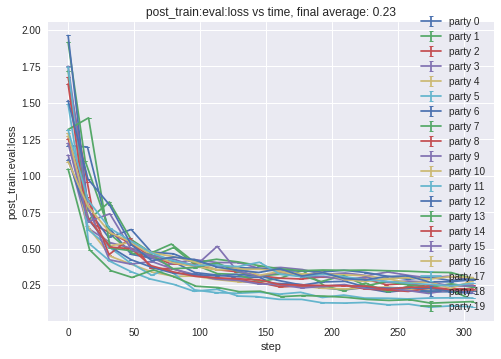

Starting trial 1/1 at 2023-04-19 08:26:00:
Trial has ID 20230419T082600
Agg connection made to 127.0.0.1
Started agg...
Party 0 connection made to 127.0.0.1
Started party 0...
Party 1 connection made to 127.0.0.1
Started party 1...
Party 2 connection made to 127.0.0.1
Started party 2...
Party 3 connection made to 127.0.0.1
Started party 3...
Party 4 connection made to 127.0.0.1
Started party 4...
Party 5 connection made to 127.0.0.1
Started party 5...
Party 6 connection made to 127.0.0.1
Started party 6...
Party 7 connection made to 127.0.0.1
Started party 7...
Party 8 connection made to 127.0.0.1
Started party 8...
Party 9 connection made to 127.0.0.1
Started party 9...
Party 10 connection made to 127.0.0.1
Started party 10...
Party 11 connection made to 127.0.0.1
Started party 11...
Party 12 connection made to 127.0.0.1
Started party 12...
Party 13 connection made to 127.0.0.1
Started party 13...
Party 14 connection made to 127.0.0.1
Started party 14...
Party 15 connection made to 12

Round progress:   0%|          | 0/20 [00:00<?, ?it/s]

Party responses:   0%|          | 0/10 [00:00<?, ?it/s]

Done training at 2023-04-19 04:32:22!
Agg finished: yes & Parties finished: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T082600/trial1/metrics_party0.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T082600/trial1/metrics_party1.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T082600/trial1/metrics_party2.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T082600/trial1/metrics_party3.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T082600/trial1/metrics_party4.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T082600/trial1/metrics_party5.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/Research/20230419T082600/trial1/metrics_party6.json
Wrote output data to /home/trevormaxjs/Documents/Engineering/R

pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
round                                                          
0      1.681892e+09                  NaN                 NaN   
1      1.681892e+09             0.899336            0.772686   
2      1.681892e+09             0.479345            0.864700   
3      1.681892e+09             0.369928            0.887786   
4      1.681892e+09             0.325188            0.903400   
5      1.681892e+09             0.300271            0.912971   
6      1.681892e+09             0.281613            0.919586   
7      1.681892e+09             0.266851            0.925086   
8      1.681892e+09             0.255727            0.928143   
9      1.681892e+09             0.245836            0.930429   
10     1.681892e+09             0.237136            0.932971   
11     1.681892e+09             0.229523            0.935371   
12     1.681892e+09             0.223467            0.938000   
13     1.681892e+09             0.217670            0.939700   
14     1.681892e+09             0.211898            0.942314   
15     1.681892e+09             0.208036            0.943800   
16     1.681892e+09             0.203714            0.945329   
17     1.681892e+09             0.200544            0.946400   
18     1.681892e+09             0.197383            0.948129   
19     1.681892e+09             0.194192            0.949957   

       pre_train:eval:f1 micro  pre_train:eval:precision micro  \
round                                                            
0                          NaN                             NaN   
1                     0.636214                        0.959214   
2                     0.855429                        0.928429   
3                     0.889286                        0.922571   
4                     0.905143                        0.927929   
5                     0.914643                        0.929429   
6                     0.921571                        0.933286   
7                     0.927071                        0.936286   
8                     0.929571                        0.937214   
9                     0.932643                        0.940071   
10                    0.935357                        0.941714   
11                    0.937643                        0.943500   
12                    0.939786                        0.945143   
13                    0.941071                        0.946071   
14                    0.942786                        0.947857   
15                    0.944357                        0.949500   
16                    0.945643                        0.950786   
17                    0.946786                        0.951714   
18                    0.948929                        0.952571   
19                    0.949286                        0.954429   

       pre_train:eval:recall micro  pre_train:eval:f1 macro  \
round                                                         
0                              NaN                      NaN   
1                         0.476429                 0.549429   
2                         0.793286                 0.840000   
3                         0.857857                 0.881643   
4                         0.884714                 0.900357   
5                         0.900500                 0.911429   
6                         0.910429                 0.918357   
7                         0.917786                 0.924429   
8                         0.922071                 0.927500   
9                         0.925143                 0.930571   
10                        0.928214                 0.933143   
11                        0.931786                 0.936500   
12                        0.934429                 0.938857   
13                        0.936000                 0.939571   
14                        0.938571                 0.941571   
15                        0.940071                 0.943571   
16         

In [14]:
for fusion in fusion_algos:
    display("testing fusion algorithm:")
    display(fusion)
    agg, party, glob = get_config(f"../../testtest/agg_tests/{fusion}/")
    results[fusion] = []
    machines = glob['machines']
    experiments = glob['experiments']
    agg['hyperparams']['global']['termination_accuracy'] = 0.999
    party['data']['info']['npz_file'] = '${staging_dir}/testtest/balanced_data/data_party${id}.npz'    
#     agg['hyperparams']['global']['rounds'] = 5
#     experiments[0]['n_parties'] = 5

    for i in range(n_trials):
        runner = Runner()
        experiments[0]
        runner.run_experiment(
            experiments[0],
            machines,
            agg,
            party,
            ui_mode="cli"
        )

        runner.call_postproc_fn()
        results[fusion].append(postproc_fn(f"../../"))

    results[fusion] = process_better_trial_results(results[fusion])
    results[fusion]['avg'].to_csv(f"../../testtest/agg_tests/{fusion}/results_avg_2.csv")
    results[fusion]['std'].to_csv(f"../../testtest/agg_tests/{fusion}/results_std_2.csv")
    display(results[fusion]['avg'])
    

In [15]:
for fusion in fusion_algos:
    results[fusion]['avg'].to_csv(f"../../testtest/agg_tests/{fusion}/results_avg_balanced.csv")
    results[fusion]['std'].to_csv(f"../../testtest/agg_tests/{fusion}/results_std_balanced.csv")

In [16]:
results['iter_avg']['avg'].columns

Index(['pre_train:ts', 'pre_train:eval:loss', 'pre_train:eval:acc',
       'pre_train:eval:f1 micro', 'pre_train:eval:precision micro',
       'pre_train:eval:recall micro', 'pre_train:eval:f1 macro',
       'pre_train:eval:precision macro', 'pre_train:eval:recall macro',
       'pre_train:eval:f1 weighted', 'pre_train:eval:precision weighted',
       'pre_train:eval:recall weighted', 'pre_train:te', 'post_train:ts',
       'post_train:eval:loss', 'post_train:eval:acc',
       'post_train:eval:f1 micro', 'post_train:eval:precision micro',
       'post_train:eval:recall micro', 'post_train:eval:f1 macro',
       'post_train:eval:precision macro', 'post_train:eval:recall macro',
       'post_train:eval:f1 weighted', 'post_train:eval:precision weighted',
       'post_train:eval:recall weighted', 'post_train:te'],
      dtype='object')

### GET FED AVG WORKING!!

In [17]:
for fusion in fusion_algos:
    results[fusion] = {}
    results[fusion]['avg'] = pd.read_csv(f"../../testtest/agg_tests/{fusion}/results_avg_2.csv", index_col=0)
    results[fusion]['std'] = pd.read_csv(f"../../testtest/agg_tests/{fusion}/results_std_2.csv", index_col=0)
    results[fusion]['avg']['train_time'] = results[fusion]['avg']['post_train:ts'] - results[fusion]['avg']['pre_train:ts'][0]
    results[fusion]['std']['train_time'] = results[fusion]['std']['post_train:ts'] - results[fusion]['std']['pre_train:ts'][0]
results

{'shuf_iter_avg': {'avg':        pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
  round                                                          
  0      1.681532e+09                  NaN                 NaN   
  1      1.681532e+09             0.896568            0.796714   
  2      1.681532e+09             0.480729            0.864071   
  3      1.681532e+09             0.374625            0.890129   
  4      1.681532e+09             0.333881            0.903114   
  5      1.681532e+09             0.311414            0.910957   
  6      1.681532e+09             0.296409            0.916600   
  7      1.681532e+09             0.283966            0.921886   
  8      1.681532e+09             0.273700            0.926700   
  9      1.681532e+09             0.265558            0.931043   
  10     1.681532e+09             0.258954            0.933386   
  11     1.681532e+09             0.253712            0.934214   
  12     1.681532e+09             0.246925          

In [18]:
import matplotlib.pyplot as plt

In [19]:
def plot_results(dict, round, metric):
    plt.figure()
    plt.title(f"{metric} per fusion algorithm at round {round}")
    for i, fusion in enumerate(dict.keys()):
        if dict[fusion]['avg'].shape[0] > 1 or round == 1:
            if round == -1:
                label = f"round {dict[fusion]['avg'].index[-1]}"
            else:
                label = ""
            plt.errorbar(
                [i],
                [dict[fusion]['avg'].iloc[round-1][metric]],
                [dict[fusion]['std'].iloc[round-1][metric]],
                marker='s', mfc='red', label=label
            )
    plt.xticks(np.arange(6), dict.keys())
    plt.ylabel(metric)
    if round == -1:
        plt.legend()
    plt.show()

    
def plot_results2(dict, metric):
    """
    """
    plt.figure()
    plt.title(f"{metric} per fusion algorithm vs training time")
    for i, fusion in enumerate(dict.keys()):
        if dict[fusion]['avg'].shape[0] > 1 or round == 1:
            plt.errorbar(
                dict[fusion]['avg']['train_time'],
                dict[fusion]['avg'][metric],
                dict[fusion]['std'][metric],
#                 marker='s', mfc='red',
                label=fusion
            )
#     plt.xticks(np.arange(6), dict.keys())
    plt.ylabel(metric)
    plt.xlabel("training time")
    plt.legend()
    plt.show()


def earlystop_results(results, metric, cutoff):
    resultscopy = {}
    for i, fusion in enumerate(results.keys()):
        resultscopy[fusion] = {}
        resultscopy[fusion]['avg'] = results[fusion]['avg'].loc[
            results[fusion]['avg'][metric] <= cutoff].copy()
        resultscopy[fusion]['std'] = results[fusion]['std'].loc[
            resultscopy[fusion]['avg'].index].copy()
    return resultscopy

In [20]:
earlystop_results(results, "post_train:eval:acc", 0.9)

{'shuf_iter_avg': {'avg':        pre_train:ts  pre_train:eval:loss  pre_train:eval:acc  \
  round                                                          
  1      1.681532e+09             0.896568            0.796714   
  2      1.681532e+09             0.480729            0.864071   
  3      1.681532e+09             0.374625            0.890129   
  
         pre_train:eval:f1 micro  pre_train:eval:precision micro  \
  round                                                            
  1                     0.620857                        0.969929   
  2                     0.855143                        0.926500   
  3                     0.889786                        0.919714   
  
         pre_train:eval:recall micro  pre_train:eval:f1 macro  \
  round                                                         
  1                         0.456929                 0.558071   
  2                         0.795500                 0.845714   
  3                         0.861714    

flf1 weighted - 

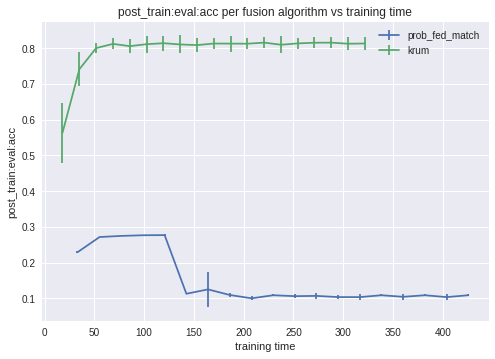

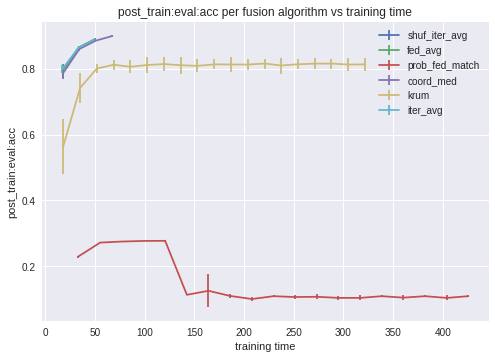

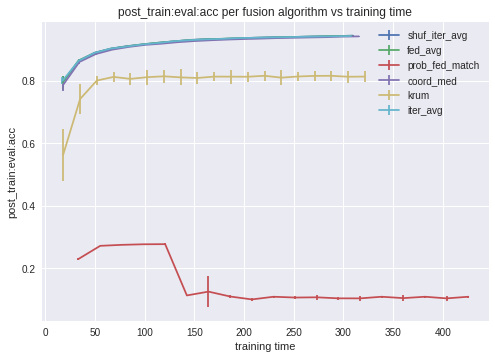

In [21]:
plot_results2(earlystop_results(results, "post_train:eval:acc", 0.85), "post_train:eval:acc")

plot_results2(earlystop_results(results, "post_train:eval:acc", 0.9), "post_train:eval:acc")

plot_results2(earlystop_results(results, "post_train:eval:acc", 0.95), "post_train:eval:acc")

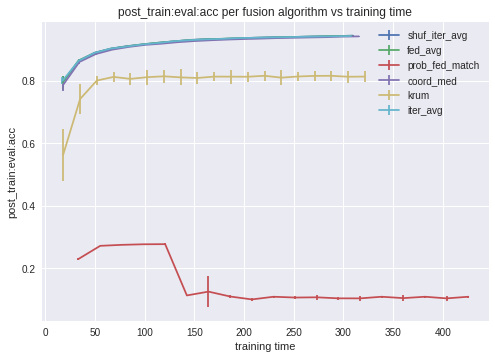

In [22]:
# plot_results2(results, "train_time")
plot_results2(results, "post_train:eval:acc")


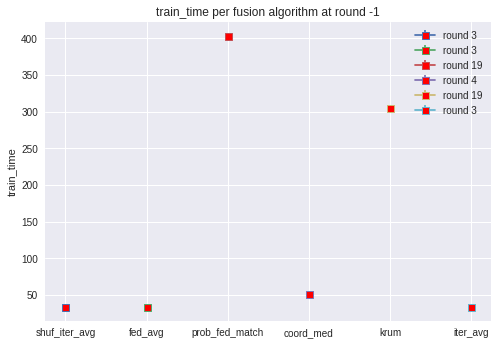

In [23]:
plot_results(
    earlystop_results(results, "post_train:eval:acc", 0.9),
    -1,
    "train_time"
)

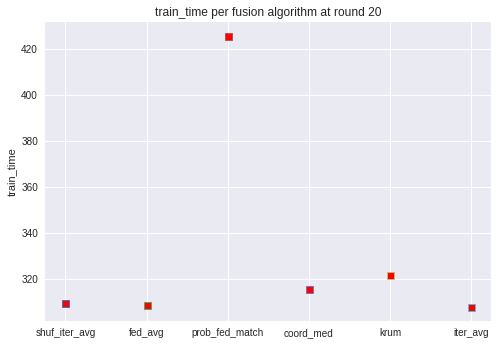

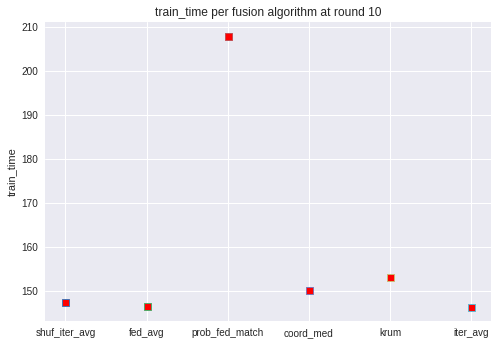

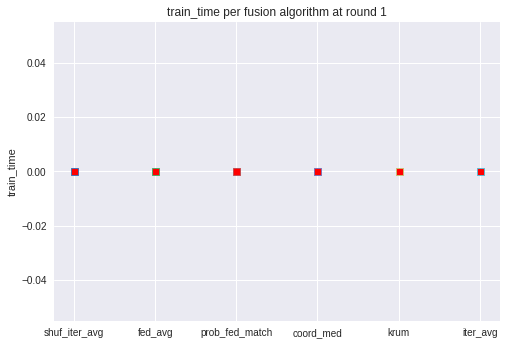

In [24]:
plot_results(results, 20, "train_time")

plot_results(results, 10, "train_time")

plot_results(results, 1, "train_time")

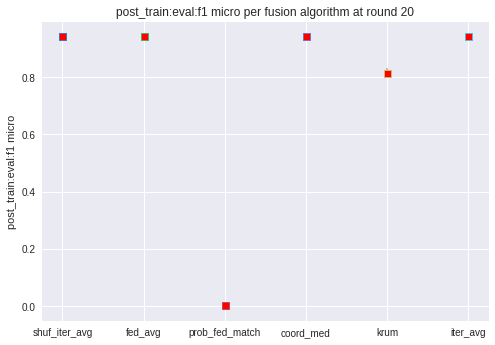

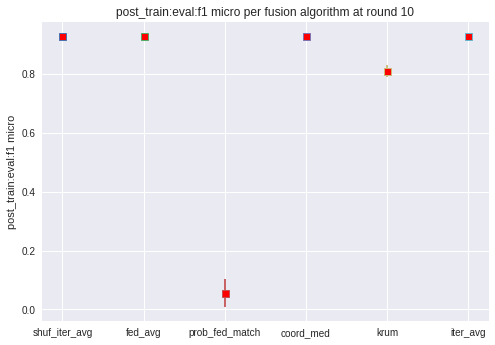

/home/trevormaxjs/miniconda3/envs/fed/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


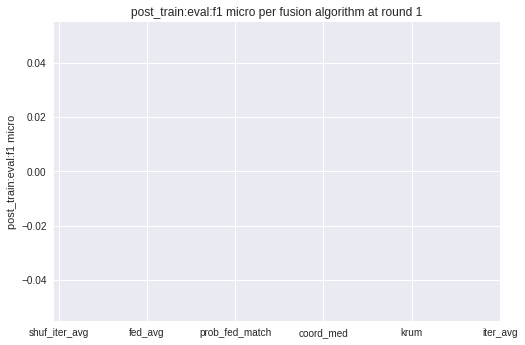

In [25]:
plot_results(results, 20, "post_train:eval:f1 micro")

plot_results(results, 10, "post_train:eval:f1 micro")

plot_results(results, 1, "post_train:eval:f1 micro")

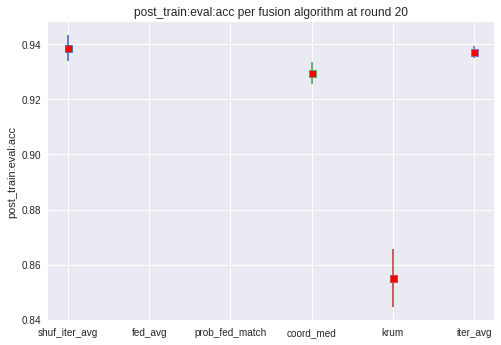

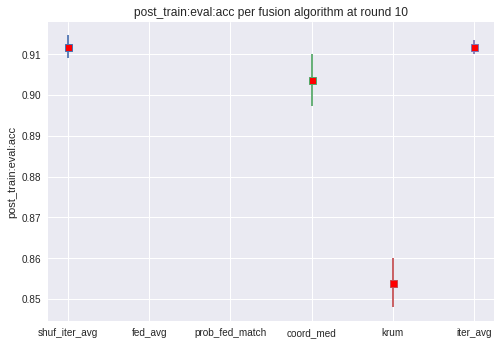

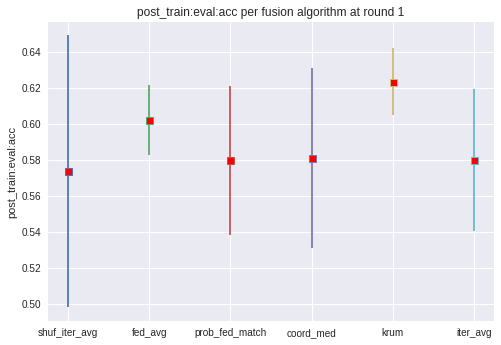

In [15]:
plot_results(results, 20, "post_train:eval:acc")

plot_results(results, 10, "post_train:eval:acc")

plot_results(results, 1, "post_train:eval:acc")

round number vs metric, plot all 6 curves

Usually add rounds but few epochs per round, start with 3 rounds. Find optimal number of rounds and use that as a baseline for further tests.

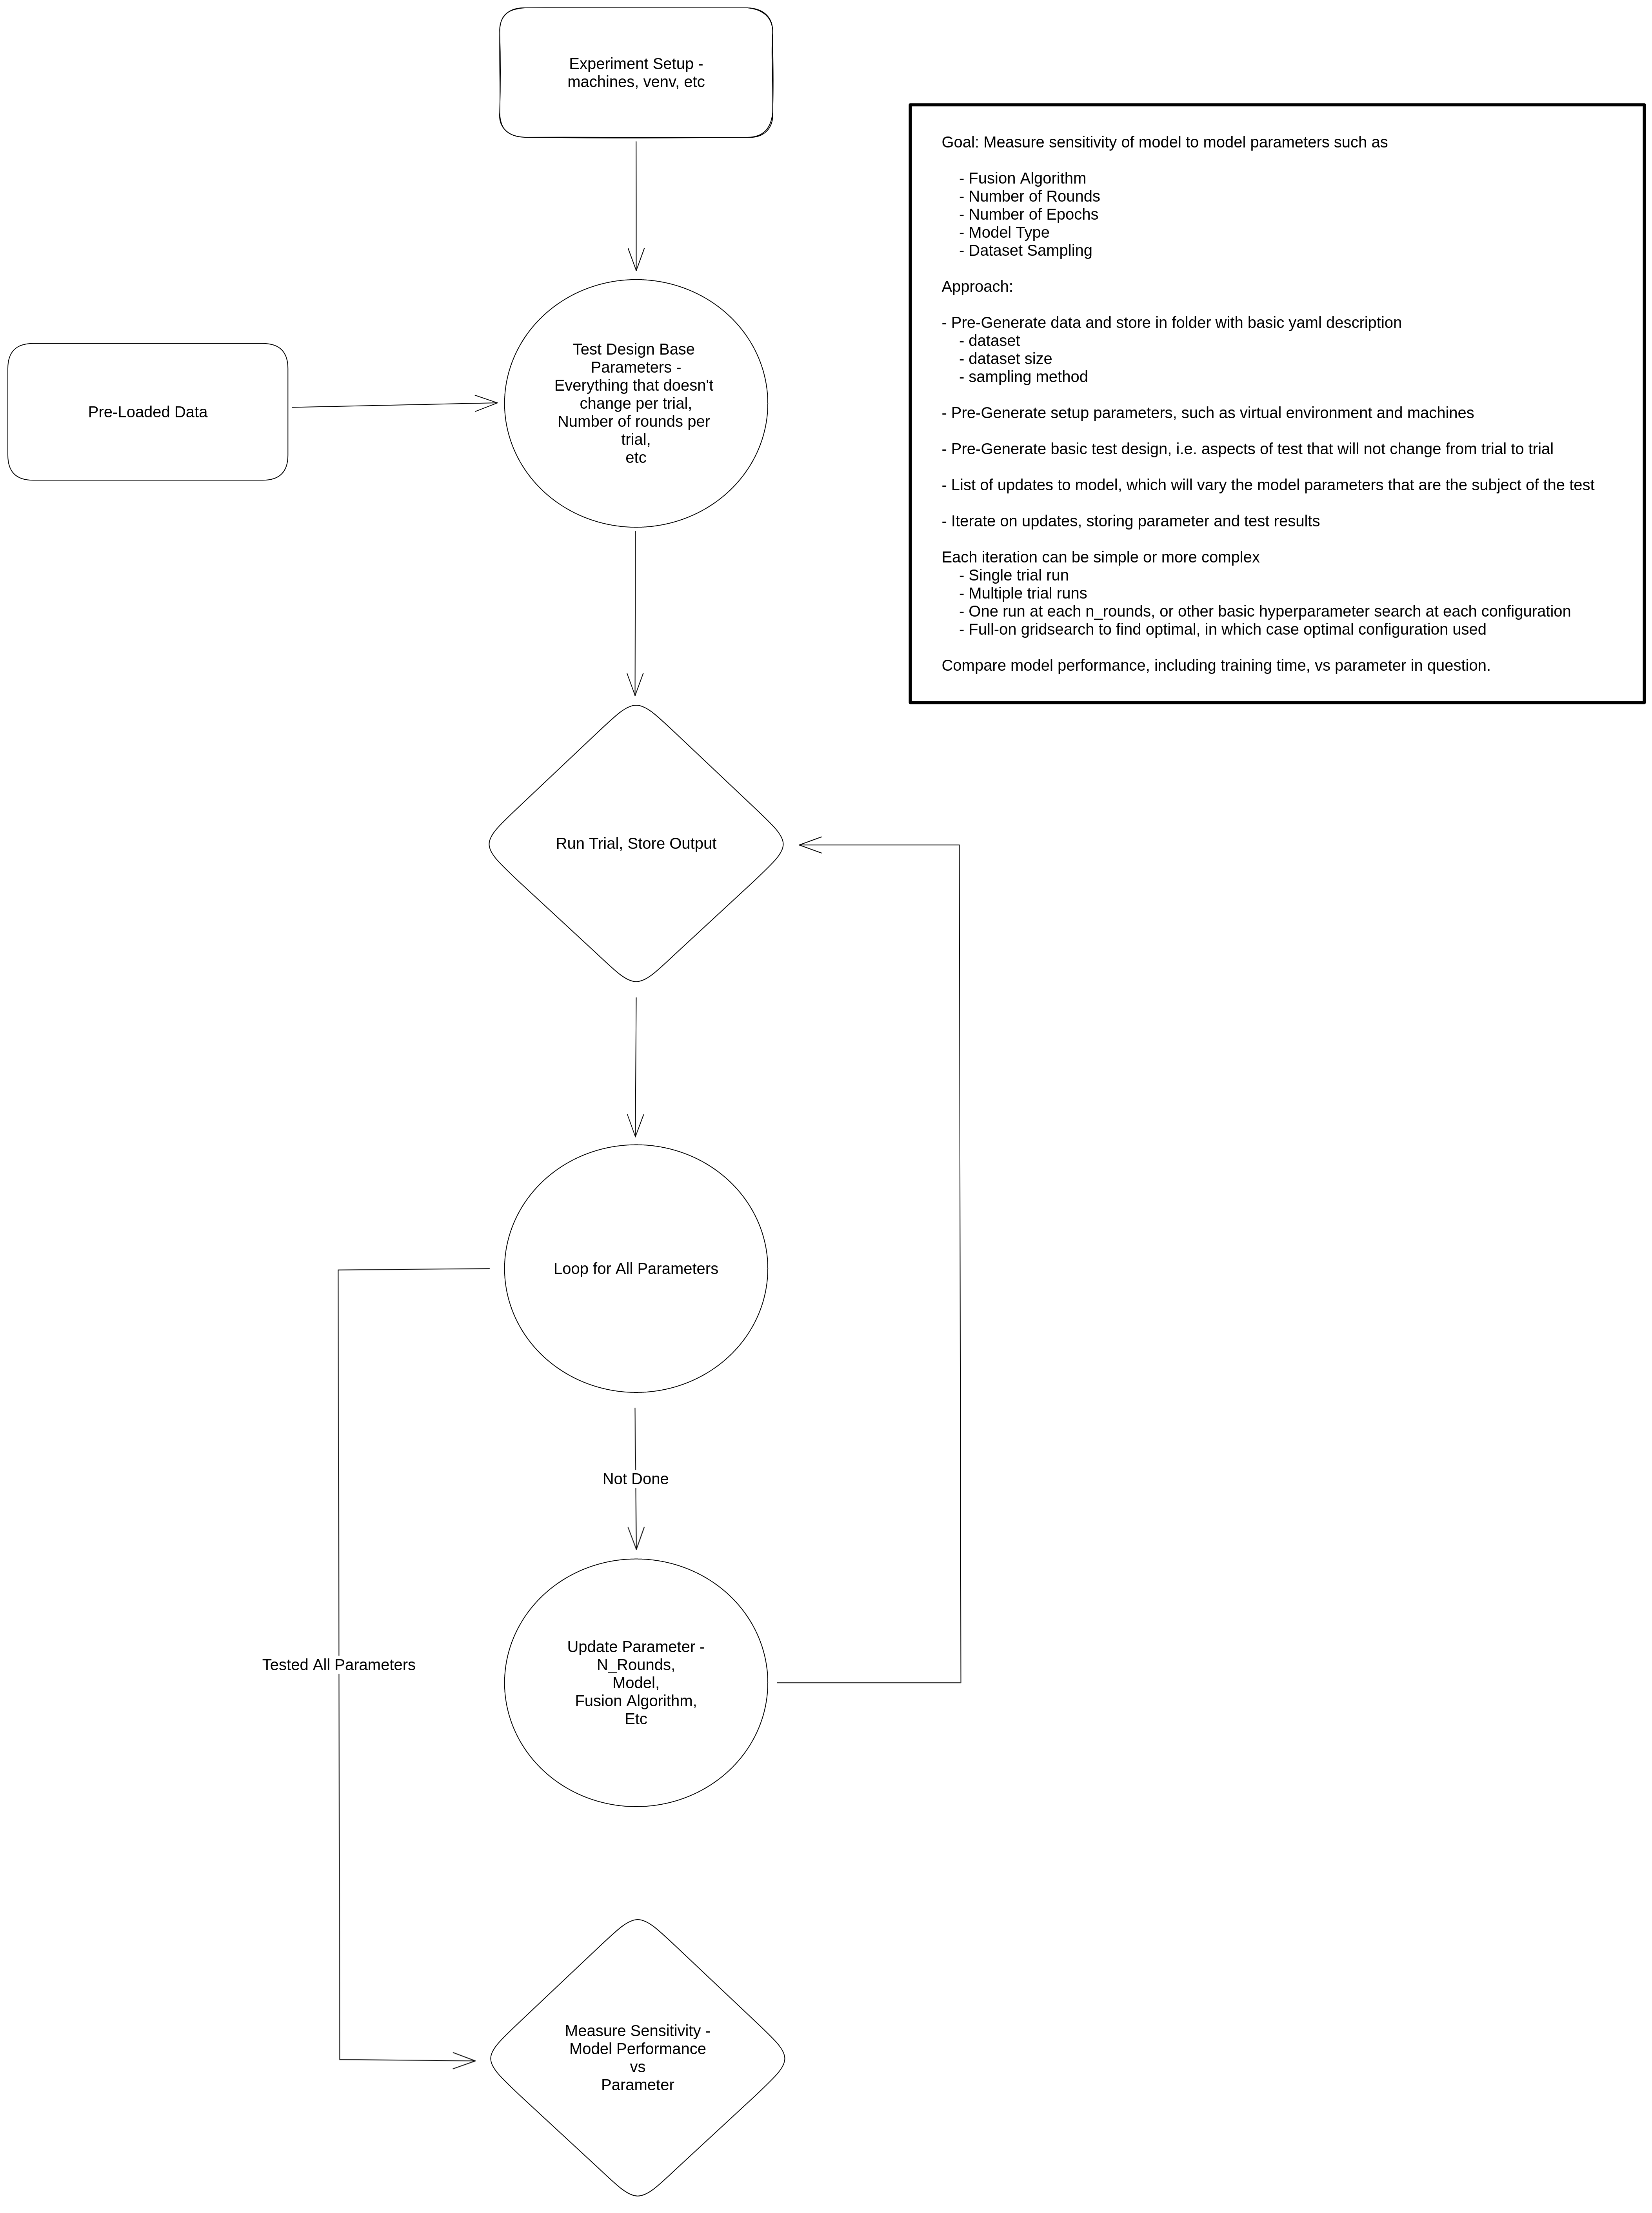